In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample_data/GOTO.JK.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-11,400.0,416.0,372.0,382.0,382.0,9410897000
1,2022-04-12,422.0,442.0,360.0,370.0,370.0,3887331000
2,2022-04-13,370.0,380.0,360.0,374.0,374.0,3262811400
3,2022-04-14,374.0,382.0,374.0,376.0,376.0,3675981900
4,2022-04-18,376.0,380.0,370.0,378.0,378.0,2660312700
...,...,...,...,...,...,...,...
553,2024-08-05,52.0,52.0,50.0,51.0,51.0,5466579700
554,2024-08-06,51.0,51.0,50.0,50.0,50.0,1271351800
555,2024-08-07,51.0,51.0,50.0,50.0,50.0,1579478100
556,2024-08-08,51.0,51.0,50.0,50.0,50.0,1628260800


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-04-11,382.0
1,2022-04-12,370.0
2,2022-04-13,374.0
3,2022-04-14,376.0
4,2022-04-18,378.0
...,...,...
553,2024-08-05,51.0
554,2024-08-06,50.0
555,2024-08-07,50.0
556,2024-08-08,50.0


In this section I only take date and close data, the data I get is quite neat so there is not too much cleaning process.

In [ ]:
df['Date']

,Date
0,2022-04-11
1,2022-04-12
2,2022-04-13
3,2022-04-14
4,2022-04-18
...,...
553,2024-08-05
554,2024-08-06
555,2024-08-07
556,2024-08-08


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-04-11')
datetime_object

datetime.datetime(2022, 4, 11, 0, 0)

In [ ]:
df

,Date,Close
0,2022-04-11,382.0
1,2022-04-12,370.0
2,2022-04-13,374.0
3,2022-04-14,376.0
4,2022-04-18,378.0
...,...,...
553,2024-08-05,51.0
554,2024-08-06,50.0
555,2024-08-07,50.0
556,2024-08-08,50.0


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-68-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,2022-04-11
1,2022-04-12
2,2022-04-13
3,2022-04-14
4,2022-04-18
...,...
553,2024-08-05
554,2024-08-06
555,2024-08-07
556,2024-08-08


In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2022-04-11,382.0
2022-04-12,370.0
2022-04-13,374.0
2022-04-14,376.0
2022-04-18,378.0
...,...
2024-08-05,51.0
2024-08-06,50.0
2024-08-07,50.0


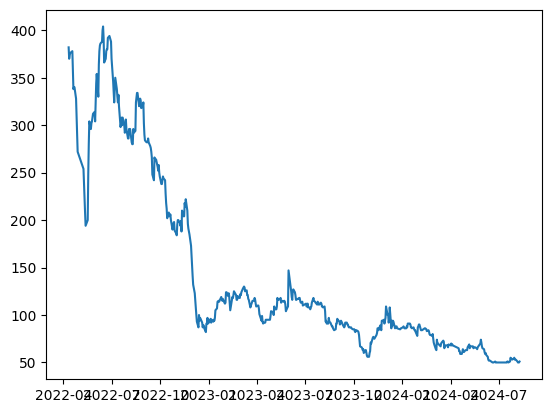

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    # Filter dataframe once instead of repeatedly in the loop
    dataframe = dataframe.loc[first_date:last_date]

    # Prepare empty lists to collect data
    dates = []
    X, Y = [], []

    # Create rolling windows over the dataframe
    for end_date in dataframe.index[n:]:
        start_date = end_date - pd.Timedelta(days=n)
        df_subset = dataframe.loc[start_date:end_date]

        # Ensure the window contains the required number of data points
        if len(df_subset) < n + 1:
            print(f'Error: Window of size {n} is too large for date {end_date}')
            continue

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(end_date)
        X.append(x)
        Y.append(y)

    # Create the final DataFrame
    ret_df = pd.DataFrame({
        'Target Date': dates,
        'Target': Y
    })

    # Add the windowed data to the DataFrame
    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    return ret_df

# Example usage
windowed_df = df_to_windowed_df(df, '2022-04-11', '2024-08-09', n=3)
print(windowed_df)


Error: Window of size 3 is too large for date 2022-04-18 00:00:00
Error: Window of size 3 is too large for date 2022-04-19 00:00:00
Error: Window of size 3 is too large for date 2022-04-20 00:00:00
Error: Window of size 3 is too large for date 2022-04-25 00:00:00
Error: Window of size 3 is too large for date 2022-04-26 00:00:00
Error: Window of size 3 is too large for date 2022-04-27 00:00:00
Error: Window of size 3 is too large for date 2022-05-09 00:00:00
Error: Window of size 3 is too large for date 2022-05-10 00:00:00
Error: Window of size 3 is too large for date 2022-05-11 00:00:00
Error: Window of size 3 is too large for date 2022-05-17 00:00:00
Error: Window of size 3 is too large for date 2022-05-18 00:00:00
Error: Window of size 3 is too large for date 2022-05-19 00:00:00
Error: Window of size 3 is too large for date 2022-05-23 00:00:00
Error: Window of size 3 is too large for date 2022-05-24 00:00:00
Error: Window of size 3 is too large for date 2022-05-25 00:00:00
Error: Win

df_to_windowed_df function, which aims to convert time series data into windowed data for predictive analysis, such as in regression models or machine learning.

This function accepts four parameters: dataframe, first_date_str, last_date_str, and n. The dataframe parameter is a DataFrame that contains time series data with an index of date. first_date_str and last_date_str are strings that indicate the date range to be used, and n is the window size, which is the number of previous days that will be used as a feature to predict the closing price (e.g., stock price) on a given day.

The function first converts the date strings first_date_str and last_date_str into datetime objects using pd.to_datetime, and then filters the dataframe according to the date range. Next, the function creates rolling windows on the DataFrame, with each window consisting of n previous data used to predict the values on the target date. These values are stored in two lists: X for the window data (features) and Y for the prediction target.

If the window size is too large and there is not enough data available, the function will display an error message and proceed to the next window. After the entire window is formed, the function creates a new DataFrame with the target date, target value, and features formed from the previous values. This data is then returned as output.

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((191,), (191, 3, 1), (191,))

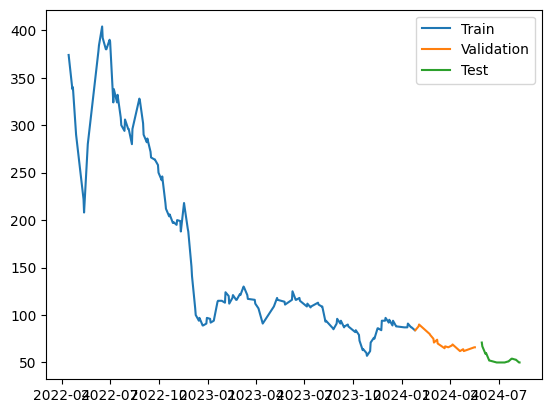

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

The code above divides the dataset into three parts: train, validation, and test data, and then visualizes each part using a line plot.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 35354.5547 - mean_absolute_error: 162.7213 - val_loss: 5191.9707 - val_mean_absolute_error: 71.5701
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 37504.6875 - mean_absolute_error: 168.7017 - val_loss: 5120.7251 - val_mean_absolute_error: 71.0697
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 36119.2812 - mean_absolute_error: 164.1098 - val_loss: 5045.0693 - val_mean_absolute_error: 70.5347
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 40339.6484 - mean_absolute_error: 173.4278 - val_loss: 4964.6670 - val_mean_absolute_error: 69.9615
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32207.2207 - mean_absolute_error: 154.2845 - val_loss: 4869.9150 - val_mean_absolute_error: 69.2806
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 34987.4844 - mean_absolute_error: 160.5256 - val_loss: 4761.1641 - val_mean_absolute_error: 68.4903
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

The above code creates and trains a neural network model using Keras to predict values from time series data. The model is built with a Sequential architecture, which consists of multiple layers:

The Input layer accepts data of the form (3, 1), which means there are 3 features with 1 value per feature.
An LSTM layer with 64 units is used to capture the temporal dependencies in the time series data.
Two Dense layers with 32 units and ReLU activation act as fully connected layers to learn non-linear patterns.
The last Dense layer with 1 unit generates a single prediction.
The model was compiled with loss function mse (mean squared error), Adam optimizer with learning rate 0.001, and performance was measured using mean_absolute_error metric. Finally, the model was trained (fit) on training data (X_train, y_train) with validation using validation data (X_val, y_val) for 100 epochs.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


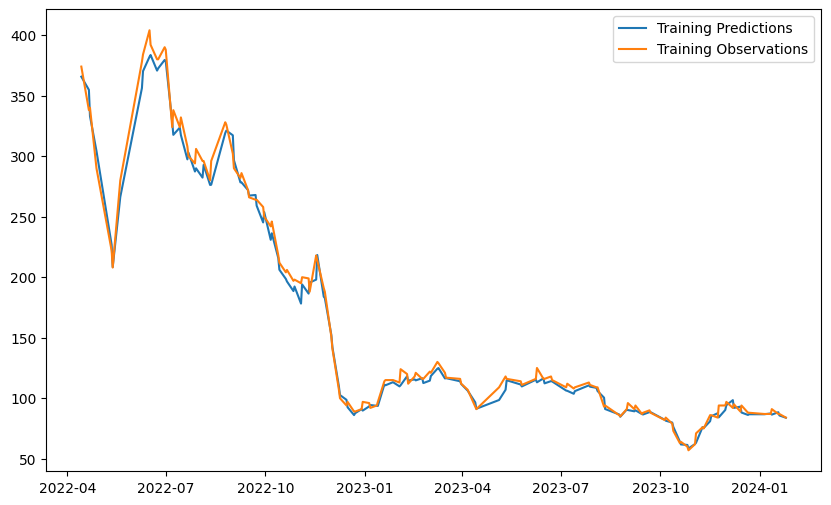

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

The model is used to predict the values of the training data (X_train), and the results are flattened into a one-dimensional array.
A plot is created to compare the model predictions (train_predictions) with the actual observed values (y_train) over the time span of the training data (dates_train).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


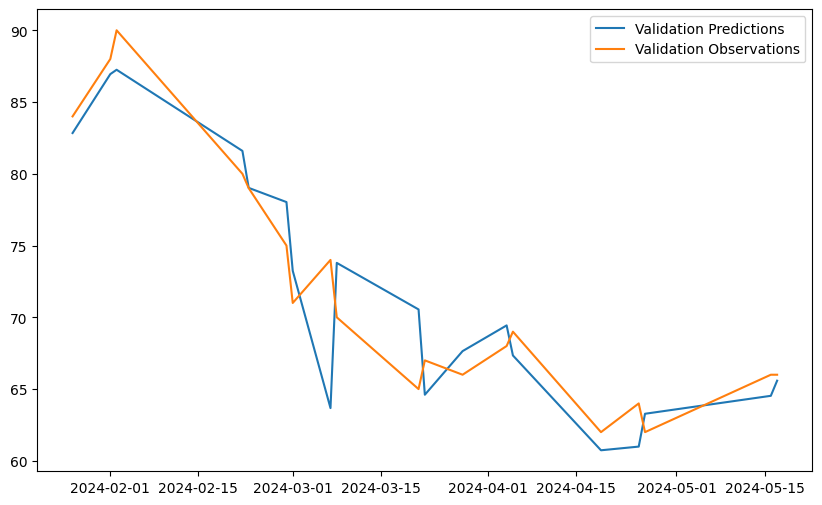

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

The model is used to predict the value of the validation data (X_val).
A plot is created to compare the model predictions (val_predictions) with the actual observed values (y_val) over the time span of the validation data (dates_val).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


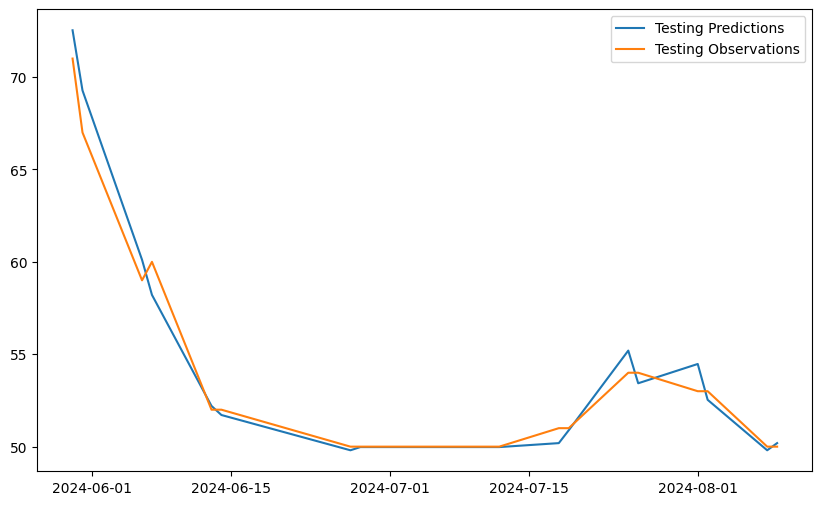

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

Model digunakan untuk memprediksi nilai dari data pengujian (X_test).
Plot dibuat untuk membandingkan prediksi model (test_predictions) dengan nilai observasi sebenarnya (y_test) sepanjang rentang waktu data pengujian (dates_test).

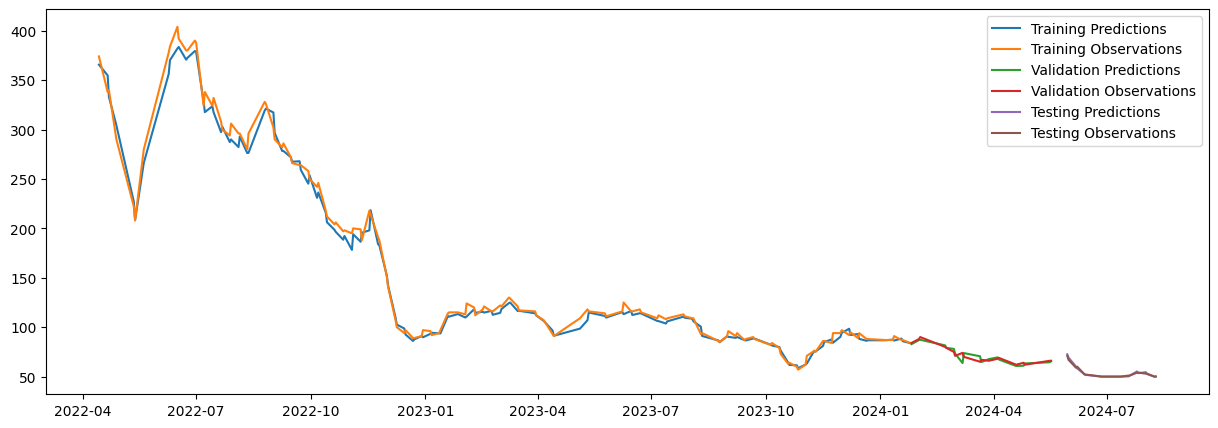

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
def predict_future(model, X_input, n_future=30):
    predictions = []
    current_input = X_input

    for _ in range(n_future):
        pred = model.predict(current_input[np.newaxis, :, :])[0, 0]
        predictions.append(pred)
        current_input = np.append(current_input[1:], pred).reshape(-1, 1)
    return predictions

X_last_input = X_test[-1]

future_predictions = predict_future(model, X_last_input, n_future=30)

future_dates = pd.date_range(start=dates_test[-1], periods=31, freq='D')[1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

The predict_future function is used to predict future values based on the last input (X_last_input).
The model is given the current input (current_input), and predictions are generated for each step forward.
The input is updated with the latest prediction, and this process is repeated until n_future predictions are generated.
The future predictions for 30 days are stored in future_predictions, with the dates generated by pd.date_range, starting from the last day of test data.

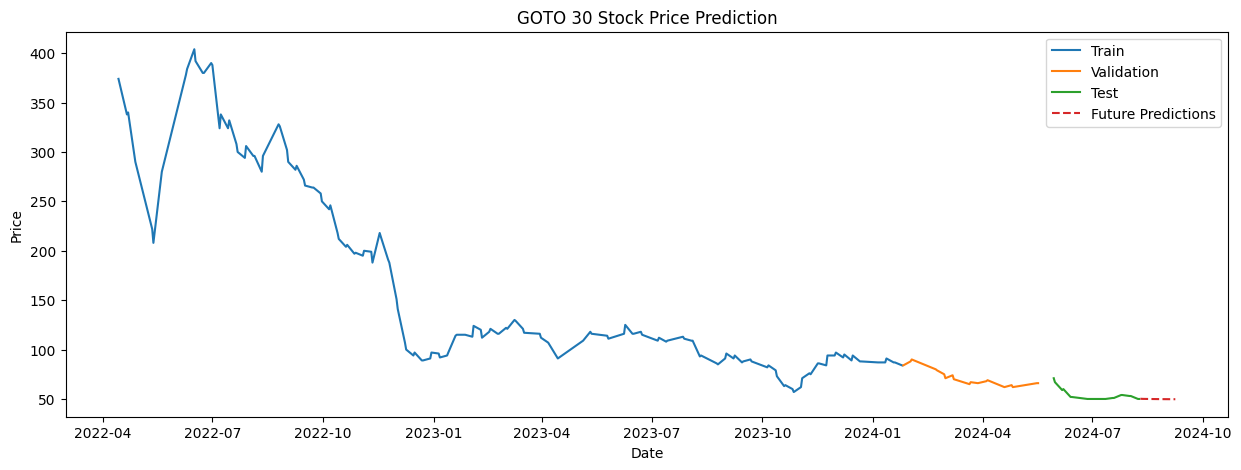

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(dates_train, y_train, label='Train')
plt.plot(dates_val, y_val, label='Validation')
plt.plot(dates_test, y_test, label='Test')

plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GOTO 30 Stock Price Prediction')
plt.legend()
plt.show()

This code aims to create a composite plot that displays the prediction results of the LSTM model along with the actual data, both for training, validation, testing, and future prediction data.

In [ ]:
future_predictions

[50.191326,
 50.15082,
 50.079697,
 50.0634,
 50.05265,
 50.030563,
 50.008953,
 49.990993,
 49.97383,
 49.956844,
 49.940662,
 49.925335,
 49.910694,
 49.8967,
 49.88333,
 49.870586,
 49.858418,
 49.8468,
 49.835716,
 49.825138,
 49.81504,
 49.805405,
 49.796204,
 49.787434,
 49.779064,
 49.77107,
 49.763443,
 49.75617,
 49.74922,
 49.742607]